# Task 2: Drug Classification

1. Download the Drug dataset on Moodle. This dataset, in csv format, contains features that are numerical, categorical and ordinal as well as one of 5 classes to predict: DrugA, DrugB, DrugC, DrugX, or DrugY.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

2. Load the dataset in Python (you can use pandas.read csv).

In [78]:
df = pd.read_csv('drug200.csv')

3. Plot the distribution of the instances in each class and store the graphic in a file called drug-distribution.pdf. You can use matplotlib.pyplot. This pre-analysis will allow you to determine if the classes are balanced, and which metric is more appropriate to use to evaluate the performance of your classifier.

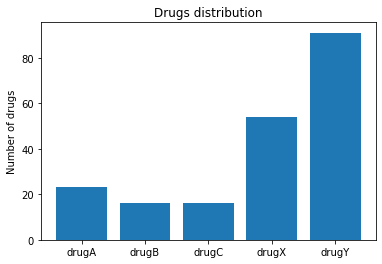

In [79]:
drugs = sorted(df['Drug'].unique())
drugA = df[df['Drug'] == 'drugA']
drugB = df[df['Drug'] == 'drugB']
drugC = df[df['Drug'] == 'drugC']
drugX = df[df['Drug'] == 'drugX']
drugY = df[df['Drug'] == 'drugY']

plt.bar(drugs, [len(drugA), len(drugB), len(drugC), len(drugX), len(drugY)])
plt.ylabel('Number of drugs')
plt.title('Drugs Distribution')
plt.savefig('drug-distribution.pdf')
plt.show()

4. Convert all ordinal and nominal features in numerical format. Make sure that your converted format respects the ordering of ordinal features, and does not introduce any ordering for nominal features. You may want to take a look at pandas.get dummies and pandas.Categorical to do this.

In [80]:
parsed_df = pd.get_dummies(df, prefix=['Sex'], columns=['Sex'])\
                .rename(columns={"Sex_F": "Female", "Sex_M": "Male"})
parsed_df['BP'] = pd.Categorical(parsed_df['BP'], ordered=True, categories=['LOW', 'NORMAL', 'HIGH']).codes
parsed_df['Cholesterol'] = pd.Categorical(parsed_df['Cholesterol'], ordered=True, categories=['NORMAL', 'HIGH']).codes
parsed_df

,Age,BP,Cholesterol,Na_to_K,Drug,Female,Male
0,23,2,1,25.355,drugY,1,0
1,47,0,1,13.093,drugC,0,1
2,47,0,1,10.114,drugC,0,1
3,28,1,1,7.798,drugX,1,0
4,61,0,1,18.043,drugY,1,0
...,...,...,...,...,...,...,...
195,56,0,1,11.567,drugC,1,0
196,16,0,1,12.006,drugC,0,1
197,52,1,1,9.894,drugX,0,1
198,23,1,0,14.020,drugX,0,1


5. Split the dataset using train test split using the default parameter values.

In [81]:
arr_no_drug = parsed_df.drop('Drug', axis=1).to_numpy()
arr_drug = parsed_df['Drug'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(arr_no_drug, arr_drug)

x_train

array([[34.   ,  2.   ,  1.   , 18.703,  0.   ,  1.   ],
       [66.   ,  2.   ,  1.   , 16.347,  0.   ,  1.   ],
       [21.   ,  2.   ,  0.   , 28.632,  1.   ,  0.   ],
       [74.   ,  2.   ,  1.   ,  9.567,  0.   ,  1.   ],
       [54.   ,  1.   ,  1.   , 24.658,  0.   ,  1.   ],
       [36.   ,  2.   ,  1.   , 11.198,  1.   ,  0.   ],
       [37.   ,  2.   ,  1.   , 13.091,  1.   ,  0.   ],
       [43.   ,  0.   ,  0.   , 19.368,  0.   ,  1.   ],
       [31.   ,  2.   ,  0.   , 11.227,  0.   ,  1.   ],
       [50.   ,  1.   ,  0.   , 15.79 ,  0.   ,  1.   ],
       [73.   ,  1.   ,  1.   , 19.221,  1.   ,  0.   ],
       [48.   ,  2.   ,  0.   , 10.446,  0.   ,  1.   ],
       [73.   ,  2.   ,  1.   , 18.348,  1.   ,  0.   ],
       [43.   ,  1.   ,  0.   , 12.859,  0.   ,  1.   ],
       [57.   ,  1.   ,  0.   , 25.893,  1.   ,  0.   ],
       [51.   ,  2.   ,  1.   , 18.295,  0.   ,  1.   ],
       [63.   ,  1.   ,  1.   , 25.917,  0.   ,  1.   ],
       [74.   ,  0.   ,  0.   ,

6. Run 6 different classifiers:

(a) NB: a Gaussian Naive Bayes Classifier (naive bayes.GaussianNB) with the default parameters.

In [82]:
GNB = GaussianNB().fit(x_train, y_train)

(b) Base-DT: a Decision Tree (tree.DecisionTreeClassifier) with the default parameters.

In [83]:
DTC = DecisionTreeClassifier().fit(x_train, y_train)

(c) Top-DT: a better performing Decision Tree found using (GridSearchCV). The gridsearch will allow you to find the best combination of hyper-parameters, as determined by the evaluation function that you have determined in step (3) above. The hyper-parameters that you will experiment with are:
- criterion: gini or entropy
- max depth : 2 different values of your choice
- min samples split: 3 different values of your choice

In [84]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [69, 420],
    'min_samples_split': [2, 5, 12]
}
GSCV = GridSearchCV(DecisionTreeClassifier(), parameters).fit(x_train, y_train)

(d) PER: a Perceptron (linear model.Perceptron), with default parameter values.

In [85]:
PERCEPTRON = Perceptron().fit(x_train, y_train)

(e) Base-MLP: a Multi-Layered Perceptron (neural network.MLPClassifier) with 1 hidden layer of
100 neurons, sigmoid/logistic as activation function, stochastic gradient descent, and default values
for the rest of the parameters.

In [86]:
MLPC = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='sgd' ).fit(x_train, y_train)

/Users/ariannechau/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(f) Top-MLP: a better performing Multi-Layered Perceptron found using grid search. For this, you need
to experiment with the following parameter values:
- activation function: sigmoid, tanh, relu and identity
- 2 network architectures of your choice: for eg 2 hidden layers with 30 + 50 nodes, 3 hidden layers with 10 + 10 + 10
- solver: Adam and stochastic gradient descent

In [87]:
parameters = {
    'activation': ['logistic', 'tanh', 'relu', 'identity'],
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ['adam', 'sgd']
}
GSCV = GridSearchCV(MLPClassifier(), parameters).fit(x_train, y_train)

/Users/ariannechau/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ariannechau/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ariannechau/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ariannechau/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

/Users/ariannechau/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ariannechau/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ariannechau/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ariannechau/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

/Users/ariannechau/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ariannechau/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ariannechau/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/ariannechau/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

7. For each of the 6 classifier above, append the following information in a file called drugs-performance.txt: (to make it easier for the TAs, make sure that your output for each sub-question below is clearly marked in your output file, using the headings (a), (b) . . .) 

(a) a clear separator (a sequence of hyphens or stars) and a string clearly describing the model (e.g. the model name + hyper-parameter values that you changed). In the case of Top-DT and Top-MLP, display the best hyperparameters found by the gridsearch.

(b) the confusion matrix

(c) the precision, recall, and F1-measure for each class

(d) the accuracy, macro-average F1 and weighted-average F1 of the model

In [107]:
with open("drug-performance.txt", "w") as myfile:
    myfile.write('')

# separator and model name

def a(txt):
    with open("drug-performance.txt", "a") as myfile:
        myfile.write("------------------------------------------------------------------")    
        myfile.write("\n\n")    
        myfile.write(txt)
        myfile.write("\n")
        myfile.write("\n")
        
# confusion matrix

def b(model):
    import itertools

    def get_confusion_matrix(x_test, y_test, y_pred):
        return confusion_matrix(y_test, y_pred)

    y_pred = model.predict(x_test)
    confusion_m = get_confusion_matrix(x_test, y_test, y_pred)

    plt.matshow(confusion_m, cmap=plt.cm.OrRd)
    plt.colorbar(fraction=0.045)
    tick_marks = np.arange(len(confusion_m))
    plt.xticks(tick_marks, drugs, rotation=45)
    plt.yticks(tick_marks, drugs)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    for i, j in itertools.product(range(confusion_m.shape[0]), range(confusion_m.shape[1])):
            plt.text(j, i, "{:,}".format(confusion_m[i][j]), horizontalalignment="center")

    with open("drug-performance.txt", "a") as myfile:
        myfile.write('1. Confusion matrix')
        myfile.write("\n\n")
        myfile.write(str(confusion_m))
        myfile.write("\n")
        myfile.write("\n")
    
    return y_pred

# precision, recall and F-1 measure for each class

def c(y_pred):
    print(classification_report(y_test, y_pred, target_names=drugs, zero_division=0))

    with open("drug-performance.txt", "a") as myfile:
        myfile.write('2. precision, recall, and F1-measure for each class')
        myfile.write('\n\n')
        myfile.write(classification_report(y_test, y_pred, target_names=drugs, zero_division=0))
        myfile.write("\n")

# accuracy, macro-average F1 and weighted-average F1 of the model

def d(y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: {}'.format(accuracy))

    macro_avg_f1 = f1_score(y_test, y_pred, average='macro')
    print('Macro-average: {}'.format(macro_avg_f1))

    weighted_avg_f1 = f1_score(y_test, y_pred, average='macro')
    print('Weighted-average: {}'.format(weighted_avg_f1))

    with open("drug-performance.txt", "a") as myfile:
        myfile.write('3. accuracy, macro-average F1 and weighted-average F1 of the model')
        myfile.write('\n\n')
        myfile.write('Accuracy: {}'.format(accuracy))
        myfile.write("\n")
        myfile.write('Macro-average: {}'.format(macro_avg_f1))
        myfile.write("\n")
        myfile.write('Weighted-average: {}'.format(weighted_avg_f1))
        myfile.write("\n")
        myfile.write("\n")

 Gaussian Naive Bayes Classifier with the default parameters

              precision    recall  f1-score   support

       drugA       0.89      1.00      0.94         8
       drugB       0.67      1.00      0.80         2
       drugC       0.82      1.00      0.90         9
       drugX       1.00      1.00      1.00        12
       drugY       1.00      0.79      0.88        19

    accuracy                           0.92        50
   macro avg       0.87      0.96      0.90        50
weighted avg       0.94      0.92      0.92        50

Accuracy: 0.92
Macro-average: 0.9047058823529411
Weighted-average: 0.9047058823529411


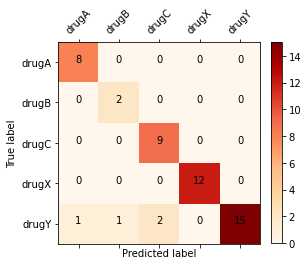

In [108]:
a('Gaussian Naive Bayes Classifier with the default parameters')
y_pred = b(GNB)
c(y_pred)
d(y_pred)

 Decision Tree with the default parameters

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         8
       drugB       1.00      1.00      1.00         2
       drugC       1.00      1.00      1.00         9
       drugX       1.00      1.00      1.00        12
       drugY       1.00      1.00      1.00        19

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Accuracy: 1.0
Macro-average: 1.0
Weighted-average: 1.0


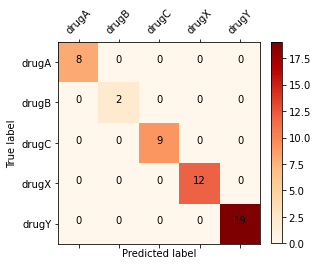

In [109]:
a('Decision Tree with the default parameters')
y_pred = b(DTC)
c(y_pred)
d(y_pred)

Decision Tree using GridSearchCV with hyper-parameters:

- criterion: gini or entropy
- max depth : 2 different values of your choice
- min samples split: 3 different values of your choice

              precision    recall  f1-score   support

       drugA       1.00      0.75      0.86         8
       drugB       0.50      1.00      0.67         2
       drugC       0.00      0.00      0.00         9
       drugX       0.47      0.75      0.58        12
       drugY       0.86      0.95      0.90        19

    accuracy                           0.70        50
   macro avg       0.57      0.69      0.60        50
weighted avg       0.62      0.70      0.65        50

Accuracy: 0.7
Macro-average: 0.6008909370199692
Weighted-average: 0.6008909370199692


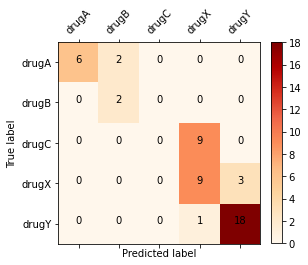

In [110]:
a('Decision Tree using GridSearchCV with hyper-parameters:\n' \
  '\t- criterion: gini or entropy\n' \
  '\t- max depth : 2 different values of your choice\n' \
  '\t- min samples split: 3 different values of your choice')
y_pred = b(GSCV)
c(y_pred)
d(y_pred)

Perceptron with default parameter values

              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         8
       drugB       0.00      0.00      0.00         2
       drugC       0.00      0.00      0.00         9
       drugX       0.00      0.00      0.00        12
       drugY       0.41      1.00      0.58        19

    accuracy                           0.38        50
   macro avg       0.08      0.20      0.12        50
weighted avg       0.16      0.38      0.22        50

Accuracy: 0.38
Macro-average: 0.11692307692307694
Weighted-average: 0.11692307692307694


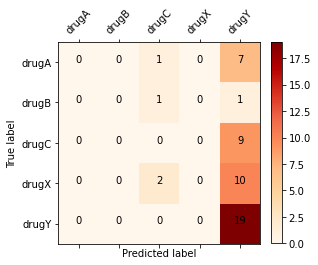

In [111]:
a('Perceptron with default parameter values')
y_pred = b(PERCEPTRON)
c(y_pred)
d(y_pred)

Multi-Layered Perceptron with 1 hidden layer of 100 neurons, sigmoid/logistic as activation function, stochastic gradient descent, and default values for the rest of the parameters

              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         8
       drugB       0.00      0.00      0.00         2
       drugC       0.00      0.00      0.00         9
       drugX       0.41      0.58      0.48        12
       drugY       0.58      1.00      0.73        19

    accuracy                           0.52        50
   macro avg       0.20      0.32      0.24        50
weighted avg       0.32      0.52      0.39        50

Accuracy: 0.52
Macro-average: 0.24270557029177722
Weighted-average: 0.24270557029177722


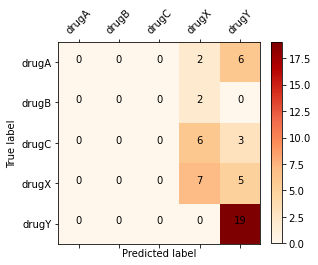

In [112]:
a('Multi-Layered Perceptron with 1 hidden layer of 100 neurons,\n' \
  'sigmoid/logistic as activation function, stochastic gradient descent,\n' \
  'and default values for the rest of the parameters')
y_pred = b(MLPC)
c(y_pred)
d(y_pred)

Multi-Layered Perceptron found using grid search with parameter values: